In [1]:
import pandas as pd
import os

actions = pd.read_excel('OneDrive_1_2024-2-19/actions.xlsx')
clients = pd.read_excel('OneDrive_1_2024-2-19/clients.xlsx')
transactions = pd.read_excel('OneDrive_1_2024-2-19/transactions.xlsx')

KeyboardInterrupt: 

In [ ]:
actions.shape

(10000, 15)

In [ ]:
clients.shape

(28751, 10)

In [ ]:
transactions.shape

(54638, 8)

In [ ]:
actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   action_id                 10000 non-null  object        
 1   action_type_label         10000 non-null  object        
 2   action_subcategory_label  10000 non-null  object        
 3   action_start_date         10000 non-null  datetime64[ns]
 4   action_year               10000 non-null  int64         
 5   action_end_date           10000 non-null  datetime64[ns]
 6   action_collection_year    10000 non-null  int64         
 7   action_collection         9999 non-null   object        
 8   action_universe           10000 non-null  object        
 9   action_category_label     10000 non-null  object        
 10  action_channel            8689 non-null   object        
 11  action_label              10000 non-null  object        
 12  client_id          

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54638 entries, 0 to 54637
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   client_id            54638 non-null  object        
 1   transaction_id       54638 non-null  object        
 2   transaction_date     54638 non-null  datetime64[ns]
 3   product_quantity     54638 non-null  int64         
 4   gross_amount_euro    54638 non-null  int64         
 5   product_category     54638 non-null  object        
 6   product_subcategory  54638 non-null  object        
 7   product_style        54631 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 3.3+ MB


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28751 entries, 0 to 28750
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   client_id                                28751 non-null  object
 1   client_country                           19095 non-null  object
 2   client_gender                            12544 non-null  object
 3   client_nationality                       12601 non-null  object
 4   client_city                              10487 non-null  object
 5   client_premium_status                    28751 non-null  int64 
 6   client_is_phone_contactable              28751 non-null  int64 
 7   client_is_email_contactable              28751 non-null  int64 
 8   client_is_instant_messaging_contactable  28751 non-null  int64 
 9   client_is_contactable                    28751 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


In [ ]:
actions.isna().sum()

action_id                      0
action_type_label              0
action_subcategory_label       0
action_start_date              0
action_year                    0
action_end_date                0
action_collection_year         0
action_collection              1
action_universe                0
action_category_label          0
action_channel              1311
action_label                   0
client_id                      0
client_is_present              0
client_is_invited              0
dtype: int64

In [ ]:
clients.isna().sum()

client_id                                      0
client_country                              9656
client_gender                              16207
client_nationality                         16150
client_city                                18264
client_premium_status                          0
client_is_phone_contactable                    0
client_is_email_contactable                    0
client_is_instant_messaging_contactable        0
client_is_contactable                          0
dtype: int64

In [ ]:
client_present = pd.merge(clients, actions, on='client_id', how='right')
print(client_present.shape)
client_present.info()

(10000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   client_id                                10000 non-null  object        
 1   client_country                           9132 non-null   object        
 2   client_gender                            4981 non-null   object        
 3   client_nationality                       7393 non-null   object        
 4   client_city                              6875 non-null   object        
 5   client_premium_status                    10000 non-null  int64         
 6   client_is_phone_contactable              10000 non-null  int64         
 7   client_is_email_contactable              10000 non-null  int64         
 8   client_is_instant_messaging_contactable  10000 non-null  int64         
 9   client_is_contactable       

In [ ]:
# check for missing values
client_present.isnull().sum()

client_id                                     0
client_country                              868
client_gender                              5019
client_nationality                         2607
client_city                                3125
client_premium_status                         0
client_is_phone_contactable                   0
client_is_email_contactable                   0
client_is_instant_messaging_contactable       0
client_is_contactable                         0
action_id                                     0
action_type_label                             0
action_subcategory_label                      0
action_start_date                             0
action_year                                   0
action_end_date                               0
action_collection_year                        0
action_collection                             1
action_universe                               0
action_category_label                         0
action_channel                          

In [ ]:
client_present.drop(['client_country', 'client_gender', 'client_nationality', 'client_city'], axis=1, inplace=True)

In [ ]:
client_present['action_channel'].value_counts()

action_channel
In store         8416
Outside venue     273
Name: count, dtype: int64

In [ ]:
client_present['client_is_present'].value_counts()

client_is_present
1    5437
0    4563
Name: count, dtype: int64

In [ ]:
client_present['client_is_invited'].value_counts()

client_is_invited
1    10000
Name: count, dtype: int64

In [ ]:
plot_columns = list(actions.columns.drop(['action_id', 'action_year', 'action_start_date', 'action_end_date', 'client_id']))


action_type_label
Business Treatment    93
Lauch                  1
Name: count, dtype: int64


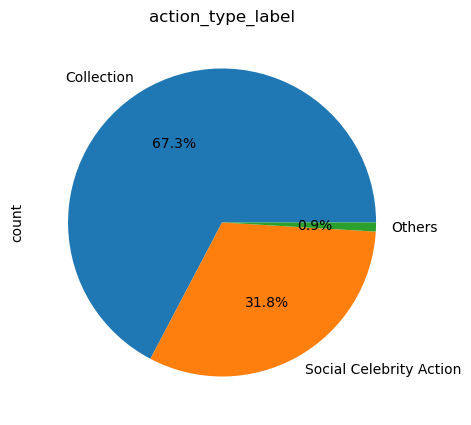

action_subcategory_label
Special Client    93
Lauch              1
Name: count, dtype: int64


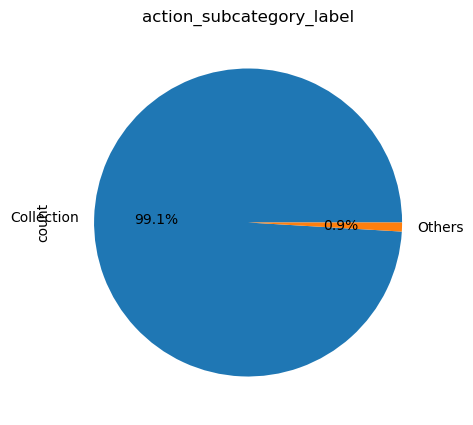

Series([], Name: count, dtype: int64)


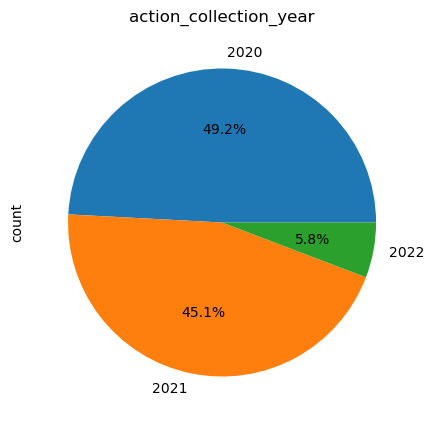

action_collection
Winter Collection                    314
Lady Collection                      286
Mid-Season Jewelry and Timepieces    211
Spring Collection                     56
Spring-Summer Collection              27
Cote d'Azur Collection                20
Art Collection                        15
Timepieces Collection                 12
Glamorous Collection                  11
Formal Retail Action                   9
Fall-Winter Collection                 7
Small Jewelry and Timepieces           1
Name: count, dtype: int64


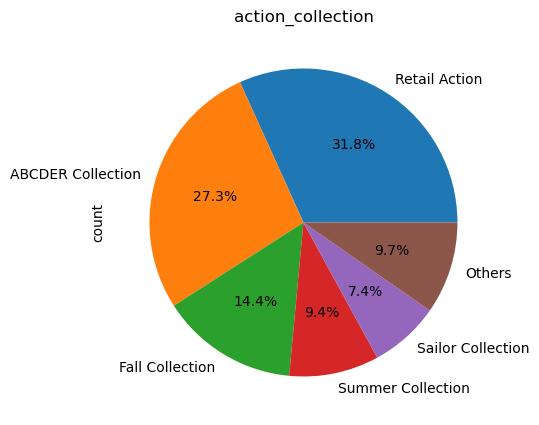

action_universe
Men's Fashion             251
Timepieces and Jewelry    224
Infant and Toddler         53
Name: count, dtype: int64


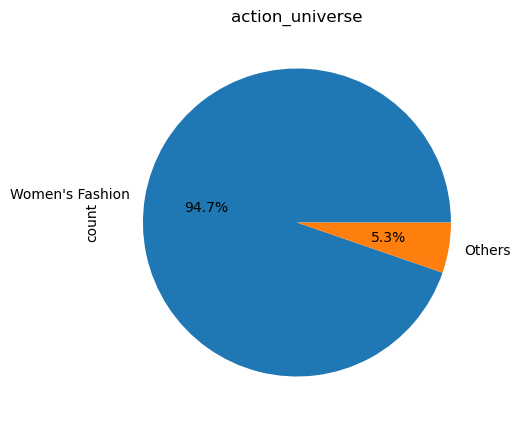

action_category_label
Client    93
Name: count, dtype: int64


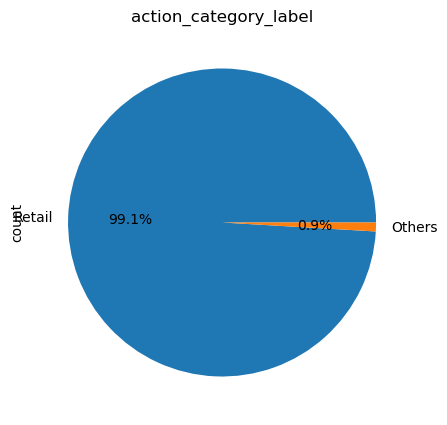

action_channel
Outside venue    273
Name: count, dtype: int64


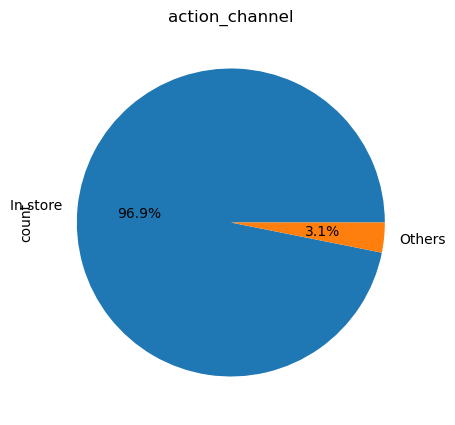

action_label
Trunk Show Event                  458
Miscellaneous Social Gathering    152
Outdoor Event                     126
Business Engagement                93
Back-to-School Promotion           15
Exclusive Client Days              14
Luxurious Fur Showcase             12
Exclusive Preview                  11
Fur Collection Rotation             5
Live Presentation                   4
Special Tailored Service            1
VIP Opening Days                    1
Internet Event                      1
Name: count, dtype: int64


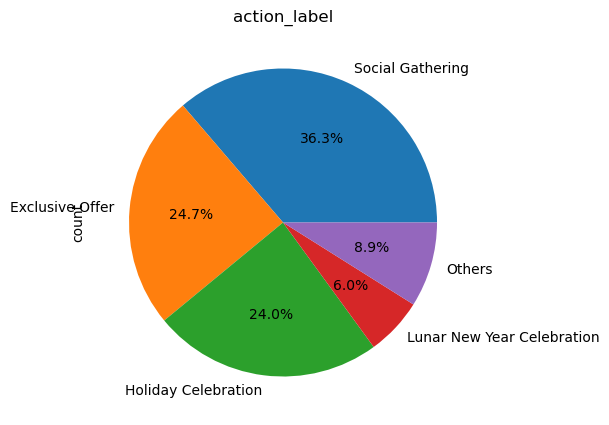

Series([], Name: count, dtype: int64)


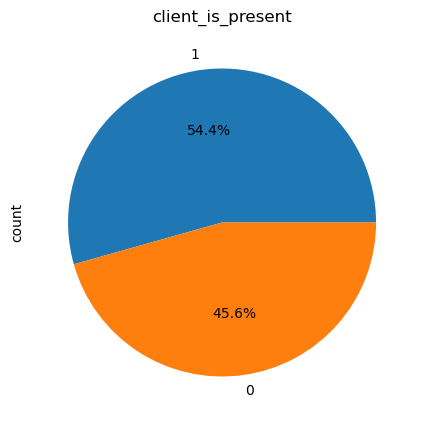

Series([], Name: count, dtype: int64)


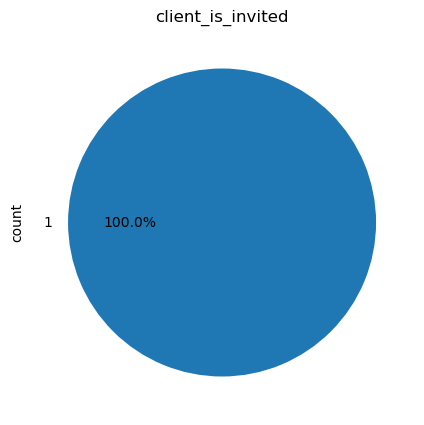

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for i in plot_columns:
    if actions[i].dtype == 'object':
        counts = actions[i].value_counts()
        small_proportions = counts[counts / len(actions) < 0.05]
        print(small_proportions)
        if not small_proportions.empty:
            counts['Others'] = small_proportions.sum()
            counts = counts.drop(small_proportions.index)
        plt.figure(figsize=(10, 5))
        counts.plot.pie(autopct='%1.1f%%')
        plt.title(i)
        plt.show()
    elif actions[i].dtype == 'int64':
        counts = actions[i].value_counts()
        small_proportions = counts[counts / len(actions) < 0.02]
        print(small_proportions)
        if not small_proportions.empty:
            counts['Others'] = small_proportions.sum()
            counts = counts.drop(small_proportions.index)
        plt.figure(figsize=(10, 5))
        counts.plot.pie(autopct='%1.1f%%')
        plt.title(i)
        plt.show()


In [ ]:
# plot the count of actions as a timeline
actions['action_start_date'] = pd.to_datetime(actions['action_start_date'])
actions['action_end_date'] = pd.to_datetime(actions['action_end_date'])

In [ ]:
start_date = actions['action_start_date'].min()
end_date = actions['action_end_date'].max()

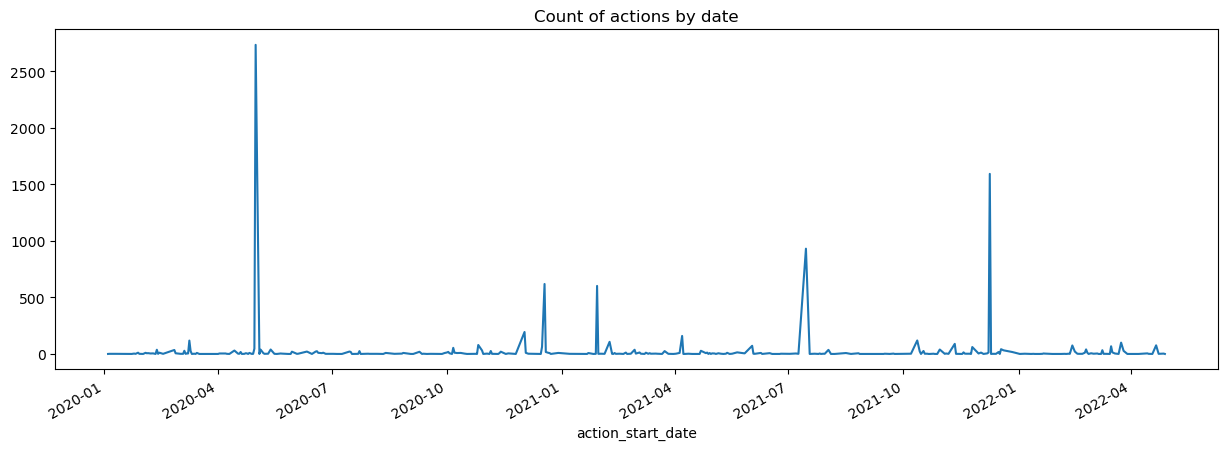

In [ ]:
mask = (actions['action_start_date'] >= start_date) & (actions['action_end_date'] <= end_date)
filtered_actions = actions.loc[mask]

actions_counts_by_date = filtered_actions.groupby('action_start_date').size()
present_actions_count_by_date = filtered_actions[filtered_actions['client_is_present'] == 1].groupby('action_start_date').size()

plt.figure(figsize=(15, 5))
actions_counts_by_date.plot()
plt.title('Count of actions by date')
plt.show()


In [ ]:
transactions[transactions['transaction_date'] > start_date]['gross_amount_euro']

0        3044
1         569
2        7727
3        3954
4        1541
         ... 
54633    2220
54634    6472
54635     111
54636    1220
54637     550
Name: gross_amount_euro, Length: 50562, dtype: int64

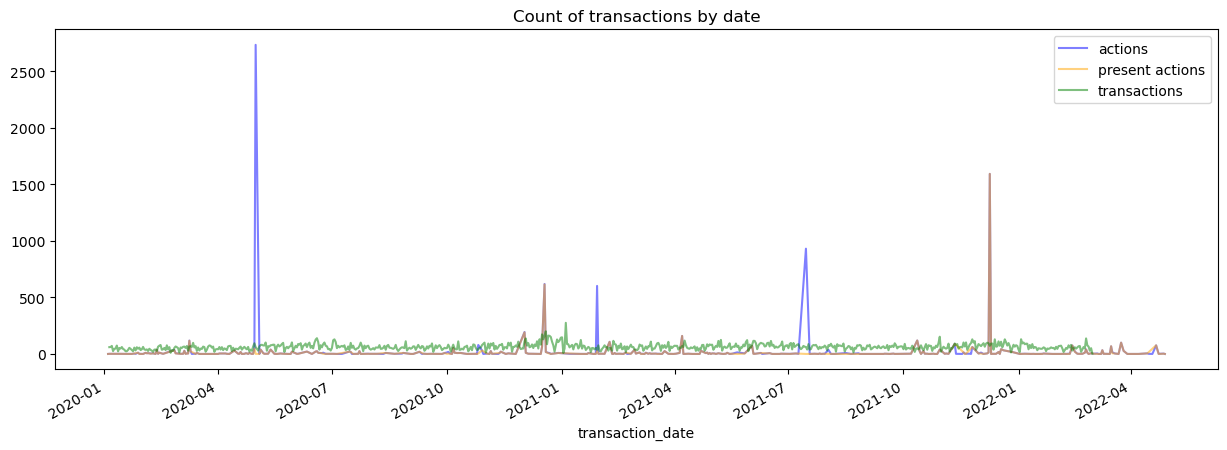

In [ ]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transctions_counts_by_date = transactions[transactions['transaction_date'] > start_date].groupby('transaction_date').size()

plt.figure(figsize=(15, 5))
actions_counts_by_date.plot(color='b', label='actions', alpha=0.5)
present_actions_count_by_date.plot(color='orange', label='present actions', alpha=0.5)
transctions_counts_by_date.plot(color='g', label='transactions', alpha=0.5)
plt.legend()
plt.title('Count of transactions by date')
plt.show()

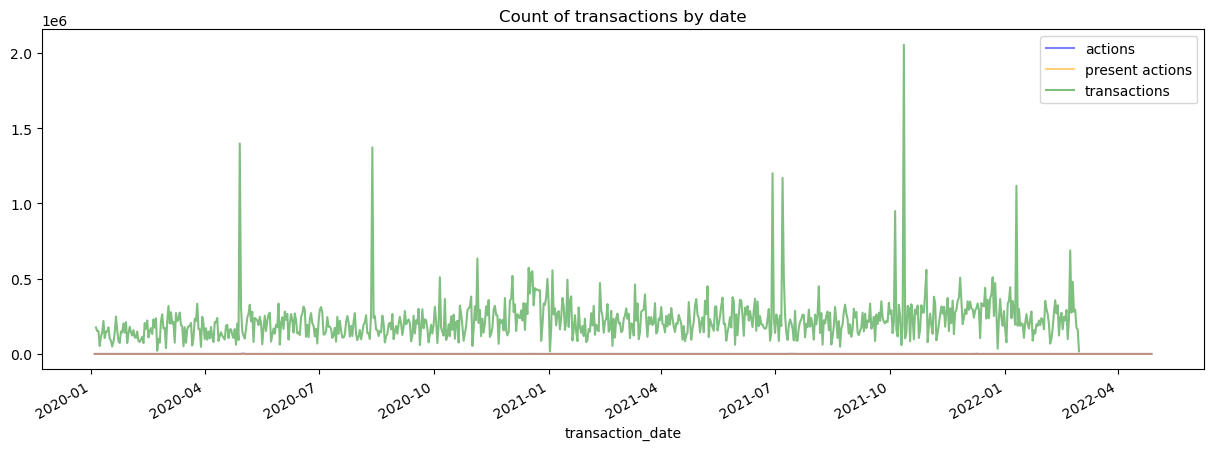

In [ ]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transctions_counts_by_date = transactions[transactions['transaction_date'] > start_date].groupby('transaction_date').sum('gross_amount_euro')

plt.figure(figsize=(15, 5))
actions_counts_by_date.plot(color='b', label='actions', alpha=0.5)
present_actions_count_by_date.plot(color='orange', label='present actions', alpha=0.5)
transctions_counts_by_date['gross_amount_euro'].plot(color='g', label='transactions', alpha=0.5)
plt.legend()
plt.title('Count of transactions by date')
plt.show()

In [ ]:
avg_transaction_per_client = transactions.groupby('client_id')

In [ ]:
# create a new dataframe where we will store the average transaction per client
avg_transaction = pd.DataFrame(columns=['client_id', 'gross_amount_euro', 'number_of_transactions'])
avg_transaction['client_id'] = transactions['client_id'].unique()

# calculate the average transaction per client
for i in avg_transaction['client_id']:
    avg_transaction.loc[avg_transaction['client_id'] == i, 'gross_amount_euro'] = transactions[transactions['client_id'] == i]['gross_amount_euro'].sum()
    avg_transaction.loc[avg_transaction['client_id'] == i, 'number_of_transactions'] = str(transactions[transactions['client_id'] == i].shape)

In [ ]:
avg_transaction

,client_id,gross_amount_euro,number_of_transactions
0,c17974679,54529,22
1,c83561585,57451,18
2,c94912160,19760,13
3,c41079463,26318,15
4,c70728767,7421,1
...,...,...,...
13879,c36938015,2220,1
13880,c19544295,6472,1
13881,c07447234,111,1
13882,c08145778,1220,1


In [ ]:
actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   action_id                 10000 non-null  object        
 1   action_type_label         10000 non-null  object        
 2   action_subcategory_label  10000 non-null  object        
 3   action_start_date         10000 non-null  datetime64[ns]
 4   action_year               10000 non-null  int64         
 5   action_end_date           10000 non-null  datetime64[ns]
 6   action_collection_year    10000 non-null  int64         
 7   action_collection         9999 non-null   object        
 8   action_universe           10000 non-null  object        
 9   action_category_label     10000 non-null  object        
 10  action_channel            8689 non-null   object        
 11  action_label              10000 non-null  object        
 12  client_id          

In [ ]:
actions_only = actions.copy()
actions_only.drop(['client_id', 'client_is_present', 'client_is_invited'], axis=1, inplace=True)
actions_only.shape

(10000, 12)

In [ ]:
# remove duplicate rows

actions_only.drop_duplicates(inplace=True)
actions_only.shape

(564, 12)

In [ ]:
actions_only_no_dates = actions_only.copy()
actions_only_no_dates.drop(['action_start_date', 'action_end_date', 'action_year', 'action_collection_year', 'action_id'], axis=1, inplace=True)

# remove duplicate rows
actions_only_no_dates.drop_duplicates(inplace=True)
actions_only_no_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 9807
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   action_type_label         108 non-null    object
 1   action_subcategory_label  108 non-null    object
 2   action_collection         107 non-null    object
 3   action_universe           108 non-null    object
 4   action_category_label     108 non-null    object
 5   action_channel            74 non-null     object
 6   action_label              108 non-null    object
dtypes: object(7)
memory usage: 6.8+ KB


In [ ]:
product_info = transactions.copy()
product_info.drop(['transaction_id', 'client_id', 'transaction_date', 'product_quantity', 'gross_amount_euro',], axis=1, inplace=True)

In [ ]:
product_info.drop_duplicates(inplace=True)
product_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 53990
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_category     188 non-null    object
 1   product_subcategory  188 non-null    object
 2   product_style        187 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [ ]:
for col in actions_only_no_dates.columns:
    if actions_only_no_dates[col].dtype == 'object':
        print('\t\t', actions_only_no_dates[col].value_counts())

		 action_type_label
Collection                 88
Social Celebrity Action    13
Business Treatment          6
Lauch                       1
Name: count, dtype: int64
		 action_subcategory_label
Collection        101
Special Client      6
Lauch               1
Name: count, dtype: int64
		 action_collection
Fall Collection                      19
Summer Collection                    15
Retail Action                        13
Sailor Collection                    12
Winter Collection                    11
Lady Collection                       5
Cote d'Azur Collection                4
Fall-Winter Collection                4
Mid-Season Jewelry and Timepieces     4
Spring Collection                     4
Timepieces Collection                 3
Art Collection                        3
Spring-Summer Collection              3
Formal Retail Action                  3
Glamorous Collection                  2
Small Jewelry and Timepieces          1
ABCDER Collection                     1
Name: count,

In [ ]:
for col in product_info.columns:
    if product_info[col].dtype == 'object':
        print('\t\t', product_info[col].value_counts())

		 product_category
Women Accessory              37
Women Bags                   17
Men Accessory                17
Men Ready-to-Wear            17
Woman Shoes                  16
Women Ready-to-Wear          15
Women Small Leather Goods    13
Men Bags                     10
House                        10
Men Small Leather Goods       9
Child                         8
Men Shoes                     7
Jewelry                       7
Watches                       2
Unknown                       2
HC                            1
Name: count, dtype: int64
		 product_subcategory
Unknown           112
bottom segment     47
top segment        29
Name: count, dtype: int64
		 product_style
Casual Style             17
N/A Style                17
Fashion Style            16
Stylish Fashion          14
Leather                  11
Canvas Style             10
Classic                  10
Formal Style             10
Upper Casual              8
Unknown Style             5
Easy Day Style            5
Pr

In [ ]:
events = actions_only_no_dates.copy()

events['event_id'] = range(1, len(events) + 1)

# merge events and actions based on all the common columns and add add if there are any new columns
events_actions = pd.merge(events, actions, on=list(events.columns.drop('event_id')), how='inner')

In [ ]:
events_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   action_type_label         10000 non-null  object        
 1   action_subcategory_label  10000 non-null  object        
 2   action_collection         9999 non-null   object        
 3   action_universe           10000 non-null  object        
 4   action_category_label     10000 non-null  object        
 5   action_channel            8689 non-null   object        
 6   action_label              10000 non-null  object        
 7   event_id                  10000 non-null  int64         
 8   action_id                 10000 non-null  object        
 9   action_start_date         10000 non-null  datetime64[ns]
 10  action_year               10000 non-null  int64         
 11  action_end_date           10000 non-null  datetime64[ns]
 12  action_collection_y

In [ ]:
events_actions.drop(['action_type_label', 'action_subcategory_label', 'action_collection', 'action_channel', 'action_label'], axis=1, inplace=True)

In [ ]:
actions = events_actions.copy()

In [ ]:
actions.to_csv('actions.csv', index=False)

In [ ]:
events.to_csv('events.csv', index=False)

In [ ]:
product_info['product_id'] = range(1, len(product_info) + 1)

In [ ]:
product_info.to_csv('product_info.csv', index=False)

In [ ]:
product_transactions = pd.merge(transactions, product_info, on=list(product_info.columns.drop('product_id')), how='inner')

In [ ]:
product_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54638 entries, 0 to 54637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   client_id            54638 non-null  object        
 1   transaction_id       54638 non-null  object        
 2   transaction_date     54638 non-null  datetime64[ns]
 3   product_quantity     54638 non-null  int64         
 4   gross_amount_euro    54638 non-null  int64         
 5   product_category     54638 non-null  object        
 6   product_subcategory  54638 non-null  object        
 7   product_style        54631 non-null  object        
 8   product_id           54638 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ MB


In [ ]:
transactions = product_transactions.copy()
transactions.drop(['product_category', 'product_subcategory', 'product_style'], axis=1, inplace=True)

In [ ]:
transactions.to_csv('transactions.csv', index=False)

In [ ]:
clients